# Sentiment Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('DataAferEDA.csv')
df

,Unnamed: 0,Name,Time,Store,Comment
0,0,macantonioc,25-06-2007,DigInfo,interesting
1,1,donkeyfly69,27-02-2008,DigInfo,not even seem convenient
2,2,donkeyfly69,27-02-2008,DigInfo,not want pay use shopping cart read recipe
3,3,donkeyfly69,27-02-2008,DigInfo,invade privacy way much just get grocery
4,4,donkeyfly69,27-02-2008,DigInfo,not even deep
...,...,...,...,...,...
209573,223255,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back
209574,223256,Mark H.,09-09-2020,Walmart,walmart
209575,223257,Lorna B.,09-09-2021,Walmart,improve site much improve
209576,223258,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...


In [5]:
import nltk

# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
#calculate the sentiment score for each comment
df['sentiment_score'] = df['Comment'].apply(lambda x: sent_analyzer.polarity_scores(x)['compound'])

def analysis(score):
  
  polarity = "neutral"

  if(score['compound']>= 0.05):
    polarity = "positive"

  elif(score['compound']<= -0.05):
    polarity = "negative"

  return polarity

def predict_sentiment(text):
  
  score = sent_analyzer.polarity_scores(text)
  return analysis(score)

# Run the predictions
df["polarity"] = df["Comment"].apply(predict_sentiment)

# Show 5 random rows of the data
df

,Unnamed: 0,Name,Time,Store,Comment,sentiment_score,polarity
0,0,macantonioc,25-06-2007,DigInfo,interesting,0.4019,positive
1,1,donkeyfly69,27-02-2008,DigInfo,not even seem convenient,0.0000,neutral
2,2,donkeyfly69,27-02-2008,DigInfo,not want pay use shopping cart read recipe,0.0191,neutral
3,3,donkeyfly69,27-02-2008,DigInfo,invade privacy way much just get grocery,0.0000,neutral
4,4,donkeyfly69,27-02-2008,DigInfo,not even deep,0.0000,neutral
...,...,...,...,...,...,...,...
209573,223255,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back,0.0000,neutral
209574,223256,Mark H.,09-09-2020,Walmart,walmart,0.0000,neutral
209575,223257,Lorna B.,09-09-2021,Walmart,improve site much improve,0.7003,positive
209576,223258,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...,0.0000,neutral


<AxesSubplot:title={'center':'Sentiment Analysis'}>

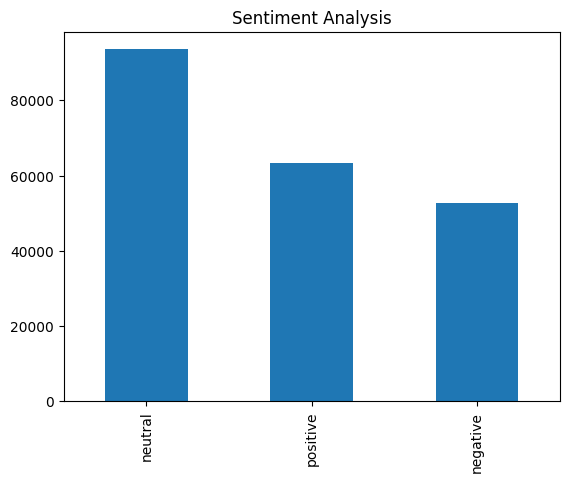

In [7]:
#count the number of positive, negative and neutral comments and plot them
df['polarity'].value_counts().plot(kind='bar', title='Sentiment Analysis')


<AxesSubplot:title={'center':'Sentiment Analysis'}, xlabel='Store'>

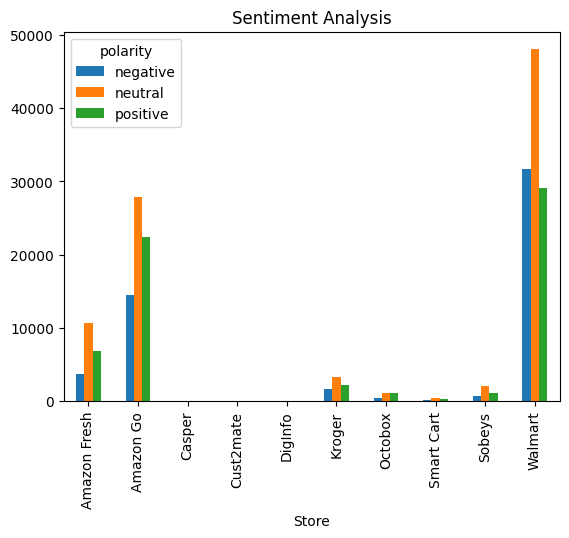

In [10]:
#count the number of positive, negative and neutral comments of each store and plot them
df.groupby('Store')['polarity'].value_counts().unstack().plot(kind='bar', title='Sentiment Analysis')
 
